In [1]:
!pip install lifelines  # install lifelines for survival analysis

  Preparing metadata (setup.py) ... done
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=a3bfb1cb8f98879f575159bc3c4b8ef19ea2313e16afd473b44896efee6ef6d7
  Stored in directory: /home/jupyter/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


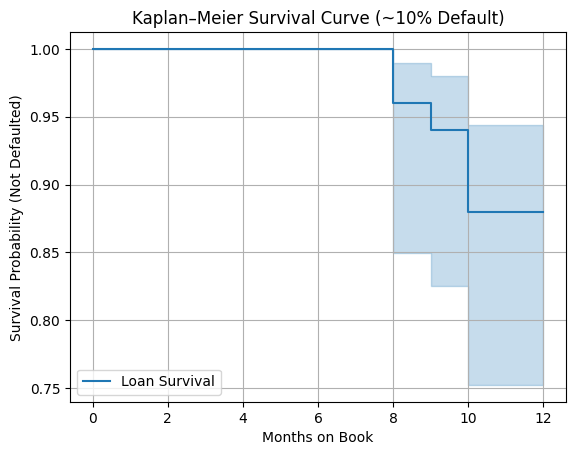

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

np.random.seed(42)

# Generate 50 synthetic loans with ~10% default by 12 months
N = 50
time_to_default = []
event_observed = []

for _ in range(N):
    # Randomly decide if this loan defaults (~10% chance) or stays current (~90%)
    r = np.random.rand()
    if r < 0.1:
        # If it defaults, pick a month between 3..10
        possible_months = [3,4,5,6,7,8,9,10]
        weights = [0.05, 0.05, 0.10, 0.20, 0.20, 0.20, 0.10, 0.10]
        d_month = np.random.choice(possible_months, p=np.array(weights)/sum(weights))
        time_to_default.append(d_month)
        event_observed.append(1)  # Default occurred
    else:
        # Otherwise, the loan survives through month 12 with no default
        time_to_default.append(12)
        event_observed.append(0)  # Censored (still current)

df_surv = pd.DataFrame({
    "loan_id": range(1, N+1),
    "time_to_default": time_to_default,
    "event_observed": event_observed
})

# Fit a Kaplan–Meier survival model
kmf = KaplanMeierFitter()
kmf.fit(
    durations=df_surv["time_to_default"],
    event_observed=df_surv["event_observed"],
    label="Loan Survival"
)

# Plot the KM survival function
kmf.plot_survival_function()
plt.title("Kaplan–Meier Survival Curve (~10% Default)")
plt.xlabel("Months on Book")
plt.ylabel("Survival Probability (Not Defaulted)")
plt.grid(True)
plt.show()

